In [1]:
import pandas as pd
import numpy as ny
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import _tree
from ucimlrepo import fetch_ucirepo 
import numpy as np

In [2]:
iris=load_iris()

In [3]:
iris_data=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [4]:
iris_data['species'] = iris.target

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
x=iris_data[iris.feature_names]
y=iris_data['species']

In [8]:
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
print(x_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                 5.5               2.4                3.7               1.0
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
75                 6.6               3.0                4.4               1.4
109                7.2               3.6                6.1               2.5
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[105 rows x 4 columns]


In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 73 to 10
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  45 non-null     float64
 1   sepal width (cm)   45 non-null     float64
 2   petal length (cm)  45 non-null     float64
 3   petal width (cm)   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [12]:
depths=range(1,6)
Recall_list=[]
Precision_list=[]
F1score_List=[]

In [13]:
#模型的参数有三个，max_depth,min_sanples_leaf,min_samples_split
#第一个参数是代表了整个树的最大深度，根节点的深度为0，往下一层深度加1
#第二个参数代表了每个叶子节点必须包含两个样本数
#第三个参数代表一个内部节点的样本数必须大于等于5才可以继续分裂

model=DecisionTreeClassifier(max_depth=1,min_samples_leaf=2,min_samples_split=5)
model.fit(x_train,y_train)
y_res=model.predict(x_test)
    
#评价指标
report = classification_report(y_test, y_res)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45



C:\Users\SPEED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SPEED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SPEED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [14]:
result_macro={}
result_micro={}
result_weighted={}

for depth in depths:
    model=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=2,min_samples_split=5)
    model.fit(x_train,y_train)
    y_res=model.predict(x_test)
    
    recall_macro=recall_score(y_test,y_res,average='macro')
    precision_macro=precision_score(y_test,y_res,average='macro')
    f1_macro=f1_score(y_test,y_res,average='macro')
    
    recall_micro=recall_score(y_test,y_res,average='micro')
    precision_micro=precision_score(y_test,y_res,average='micro')
    f1_micro=f1_score(y_test,y_res,average='micro')
    
    recall_weighted=recall_score(y_test,y_res,average='weighted')
    precision_weighted=precision_score(y_test,y_res,average='weighted')
    f1_weighted=f1_score(y_test,y_res,average='weighted')
    
                                       
    result_macro[depth]={'Recall':recall_macro,'Precision':precision_macro,'F1':f1_macro}
    result_micro[depth]={'Recall':recall_micro,'Precision':precision_micro,'F1':f1_micro}
    result_weighted[depth]={'Recall':recall_weighted,'Precision':precision_weighted,'F1':f1_weighted}
    
    #result字典的键是最大深度，值是一个内部的字典，这个字典用来存储不同的评价指标

C:\Users\SPEED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SPEED\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
print("macro:")
for depth, metrics in result_macro.items():
    print(f"max_depth = {depth}: Recall = {metrics['Recall']:.3f}, "
          f"Precision = {metrics['Precision']:.3f}, F1 Score = {metrics['F1']:.3f}")

print()
print("miro:")
for depth, metrics in result_micro.items():
    print(f"max_depth = {depth}: Recall = {metrics['Recall']:.3f}, "
          f"Precision = {metrics['Precision']:.3f}, F1 Score = {metrics['F1']:.3f}")

print()
print("weighted:")
for depth, metrics in result_weighted.items():
    print(f"max_depth = {depth}: Recall = {metrics['Recall']:.3f}, "
          f"Precision = {metrics['Precision']:.3f}, F1 Score = {metrics['F1']:.3f}")

macro:
max_depth = 1: Recall = 0.667, Precision = 0.500, F1 Score = 0.556
max_depth = 2: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 3: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 4: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 5: Recall = 1.000, Precision = 1.000, F1 Score = 1.000

miro:
max_depth = 1: Recall = 0.711, Precision = 0.711, F1 Score = 0.711
max_depth = 2: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 3: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 4: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 5: Recall = 1.000, Precision = 1.000, F1 Score = 1.000

weighted:
max_depth = 1: Recall = 0.711, Precision = 0.567, F1 Score = 0.615
max_depth = 2: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 3: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 4: Recall = 1.000, Precision = 1.000, F1 Score = 1.000
max_depth = 5: Recall = 1.000, Precis

Problem2

In [56]:
#读取数据
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

print(breast_cancer_wisconsin_diagnostic.metadata) 

print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

#合并DataFrame
if isinstance(y, pd.Series):
    data_b = X.copy()
    data_b['target'] = y
else:
    data_b = pd.concat([X, y], axis=1)



In [4]:
#处理缺失值
if data_b.isnull().sum().any():
    print("There are missing values in the dataset.")
    data_b = data_b.dropna()  

In [5]:
print(data_b.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

In [6]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [7]:
print(data_b.columns)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


In [8]:
data_b['Diagnosis'] = data_b['Diagnosis'].map({'M': 1, 'B': 0})

In [9]:
x = data_b.drop('Diagnosis', axis=1)  # 去掉目标列
y = data_b['Diagnosis']  # 目标列是 'Diagnosis'

In [10]:
#划分训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
#训练模型
model_2=DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, criterion='gini', random_state=42)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

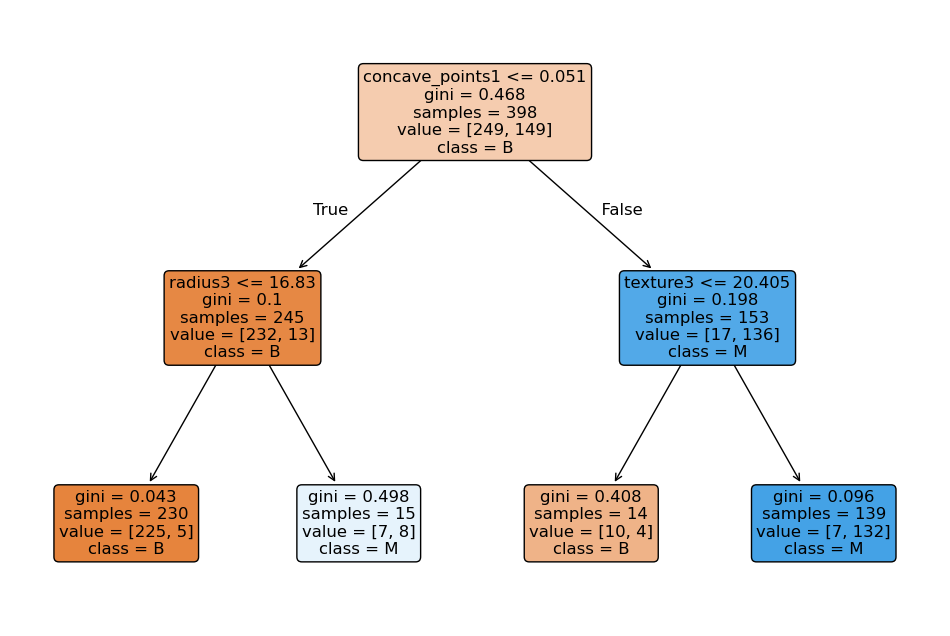

In [12]:
plt.figure(figsize=(12,8))
plot_tree(model_2, filled=True, feature_names=X.columns, class_names=['B', 'M'], rounded=True)
plt.show()

In [13]:
#计算不纯性度量，本题目是二分类问题，定义以下函数
def calculate_gini(y):
    p = np.mean(y)
    return 1 - p**2 - (1 - p)**2

def calculate_entropy(y):
    p = np.mean(y)
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p) if p > 0 and p < 1 else 0

def calculate_misclassification_error(y):
    return 1 - np.max(np.bincount(y) / len(y))

In [87]:
#若为多分类问题应该使用的是下面的函数
def gini(y):
    class_counts = np.bincount(y)
    total = len(y)
    prob = class_counts / total
    return 1 - np.sum(prob ** 2)
def entropy(y):
    class_counts = np.bincount(y)
    total = len(y)
    prob = class_counts / total
    return -np.sum(prob * np.log2(prob + 1e-10))  # 防止log(0)
def misclassification_error(y):
    cm = confusion_matrix(y, y)  
    return 1 - np.max(cm) / np.sum(cm)

In [90]:
# 基尼指数计算
gini_left = gini(left_y)
gini_right = gini(right_y)
gini_split = (len(left_y) * gini_left + len(right_y) * gini_right) / len(y_train)
# 熵计算
entropy_left = entropy(left_y)
entropy_right = entropy(right_y)
entropy_split = (len(left_y) * entropy_left + len(right_y) * entropy_right) / len(y_train)
misclassification_left = misclassification_error(left_y)
misclassification_right = misclassification_error(right_y)
misclassification_error_split = (len(left_y) * misclassification_left + len(right_y) * misclassification_right) / len(y_train)

# 计算信息增益
initial_entropy = entropy(y_train)
info_gain = initial_entropy - entropy_split

# 输出结果
print(f"First Split Feature: {first_split_feature}")
print(f"First Split Value: {first_split_value}")
print(f"Gini Index of the Split: {gini_split}")
print(f"Entropy of the Split: {entropy_split}")
print(f"Misclassification Error of the Split: {misclassification_error_split}")
print(f"Information Gain: {info_gain}")

First Split Feature: concave_points1
First Split Value: 0.05127999931573868
Gini Index of the Split: 0.1377955537323807
Entropy of the Split: 0.3776821933568697
Misclassification Error of the Split: 0.07537688442211055
Information Gain: 0.5762876765620235


In [14]:
first_split_feature = X.columns[model_2.tree_.feature[0]]  # 获取分裂特征
first_split_value = model_2.tree_.threshold[0]  # 获取分裂值b

In [15]:
y_train_values = y_train.values

In [16]:
# 获取分裂后的左右子集的标签
left_mask = X_train[first_split_feature] <= first_split_value
right_mask = ~left_mask

left_y = y_train_values[left_mask]
right_y = y_train_values[right_mask]

In [21]:
# 计算基尼指数
gini_left = calculate_gini(left_y)
gini_right = calculate_gini(right_y)
gini_split = (len(left_y) * gini_left + len(right_y) * gini_right) / len(y_train)

In [22]:
# 计算熵
entropy_left = calculate_entropy(left_y)
entropy_right = calculate_entropy(right_y)
entropy_split = (len(left_y) * entropy_left + len(right_y) * entropy_right) / len(y_train)

In [23]:
# 计算误分类率
misclassification_left = calculate_misclassification_error(left_y)
misclassification_right = calculate_misclassification_error(right_y)
misclassification_error_split = (len(left_y) * misclassification_left + len(right_y) * misclassification_right) / len(y_train)

In [24]:
# 计算信息增益
initial_entropy = calculate_entropy(y_train)
entropy_info_gain = initial_entropy - entropy_split

initial_gini=calculate_gini(y_train)
gini_info_gain=initial_gini-gini_split

initial_misclassification=calculate_misclassification_error(y_train)
misclaasification_info_gain=initial_misclassification-misclassification_error_split

In [27]:
res={
    'First Split Feature':[first_split_feature],
    'First Split Value':[first_split_value],
    'Gini Index of the Split':[gini_split],
    'Entropy of the Split':[entropy_split],
    "Misclassification Error of the Split":[misclassification_error_split],
    'Entropy Information Gain':[entropy_info_gain],
    'Gini Information Gain':[gini_info_gain],
    'Misclaasification Information Gain':[misclaasification_info_gain]
}
    

In [28]:
pd.DataFrame(res)

,First Split Feature,First Split Value,Gini Index of the Split,Entropy of the Split,Misclassification Error of the Split,Entropy Information Gain,Gini Information Gain,Misclaasification Information Gain
0,concave_points1,0.05128,0.137796,0.377682,0.075377,0.576288,0.33064,0.298995


In [29]:
# 输出结果
print(f"First Split Feature: {first_split_feature}")
print(f"First Split Value: {first_split_value}")
print(f"Gini Index of the Split: {gini_split}")
print(f"Entropy of the Split: {entropy_split}")
print(f"Misclassification Error of the Split: {misclassification_error_split}")
print(f"Entropy Information Gain: {entropy_info_gain}")
print(f"Gini Information Gain: {gini_info_gain}")
print(f"Misclaasification Information Gain: {misclaasification_info_gain}")

First Split Feature: concave_points1
First Split Value: 0.05127999931573868
Gini Index of the Split: 0.13779555373238073
Entropy of the Split: 0.3776821936454087
Misclassification Error of the Split: 0.07537688442211055
Entropy Information Gain: 0.5762876765620235
Gini Information Gain: 0.33063958679437366
Misclaasification Information Gain: 0.2989949748743719
